# ANOVA

In [16]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistical functions.
import scipy.stats as stats

# Mathematical functions.
import math

# Data frames.
import pandas as pd

## More Samples

In [2]:
# First sample.
sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)

# Second sample.
sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)

# Third sample.
sample_c = np.random.normal(loc=10.0, scale=1.0, size=50)

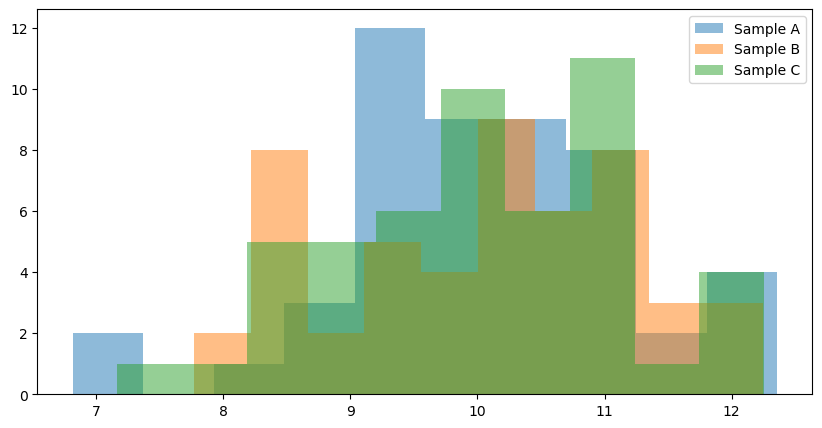

In [3]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_a, bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_b, bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_c, bins=10, alpha=0.5, label='Sample C')

# Add a legend.
ax.legend();

In [4]:
# Independent samples t-test on sample_a and sample_b.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b)

# Show.
t_statistic, p_value

(-0.08104382710147962, 0.9355723807020623)

In [5]:
# Independent samples t-test on sample_b and sample_a.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_a)

# Show.
t_statistic, p_value

(0.08104382710147962, 0.9355723807020623)

In [6]:
# Independent samples t-test on sample_a and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_c)

# Show.
t_statistic, p_value

(-0.0743531917778076, 0.9408809130233478)

In [7]:
# Independent samples t-test on sample_b and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_c)

# Show.
t_statistic, p_value

(0.0076670890767036644, 0.9938981939775824)

## $n$ Samples

In [8]:
# Number of samples.
n = 4

In [9]:
# Show the sample labels.
print(list(range(4)))

[0, 1, 2, 3]


For 4 samples, we can perform 6 t-tests:

[0, 1]  
[0, 2]  
[0, 3]  
[1, 2]  
[1, 3]  
[2, 3]  

In [10]:
# Number of ways of selecting two samples from n.
math.comb(n, 2)

6

In [11]:
# Suppose we had 6 samples.
n = 6
math.comb(n, 2)

15

In [12]:
# Suppose we had 6 samples.
n = 7
math.comb(n, 2)

21

## Type I Errors

In [13]:
def simulate_ttest(alpha=0.05):
    # Geneate a random sample a.
    sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)
    # Generate similar sample b.
    sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)
    
    # Perform the t-test.
    _, p_value = stats.ttest_ind(sample_a, sample_b)
    
    # Decide whether to reject the null hypothesis.
    if p_value < alpha:
        return True
    else:
        return False

In [14]:
# Number of rejections.
no_rejections = 0

# Run several simulations.
for _ in range(10000):
    # Check if the null hypothesis is rejected.
    if simulate_ttest():
        # Increment the number of rejections.
        no_rejections += 1

# Show the number of rejections.
no_rejections

527

## ANOVA

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html  
https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php  

In [32]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

In [33]:
# Create data frame.
df = pd.DataFrame({'Beginner': beginner, 'Intermediate': intermediate, 'Advanced': advanced})

# Show.
df

,Beginner,Intermediate,Advanced
0,29.016131,20.188079,29.714441
1,28.040544,25.789485,20.025650
2,31.724753,25.447969,20.826054
3,29.615148,21.698500,28.059747
4,31.969329,23.061975,26.515771
5,27.101424,28.423868,21.026850
6,27.272983,22.829789,23.793102
7,29.367353,20.946556,23.046562
8,29.172003,24.446049,22.755910
9,26.609146,19.233451,22.069493


In [34]:
# Describe.
df.describe()

,Beginner,Intermediate,Advanced
count,10.000000,10.000000,10.000000
mean,28.988881,23.206572,23.783358
std,1.825957,2.845925,3.264823
min,26.609146,19.233451,20.025650
25%,27.464873,21.134542,21.287511
50%,29.094067,22.945882,22.901236
75%,29.553199,25.197489,25.835104
max,31.969329,28.423868,29.714441


In [35]:
# Perform ANOVA.
f_statistic, p_value = stats.f_oneway(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
f_statistic, p_value

(13.77510905260031, 7.527628589286891e-05)

In [37]:
# Tukey's HSD.
res = stats.tukey_hsd(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      5.782     0.000     2.773     8.791
 (0 - 2)      5.206     0.001     2.196     8.215
 (1 - 0)     -5.782     0.000    -8.791    -2.773
 (1 - 2)     -0.577     0.883    -3.586     2.432
 (2 - 0)     -5.206     0.001    -8.215    -2.196
 (2 - 1)      0.577     0.883    -2.432     3.586



## End